In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv("/home/ines/ml_assignment/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 12개의 Columns, 891개의 Rows
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# 상관계수 확인결과 Pclass와 survived가 제일 높다.
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


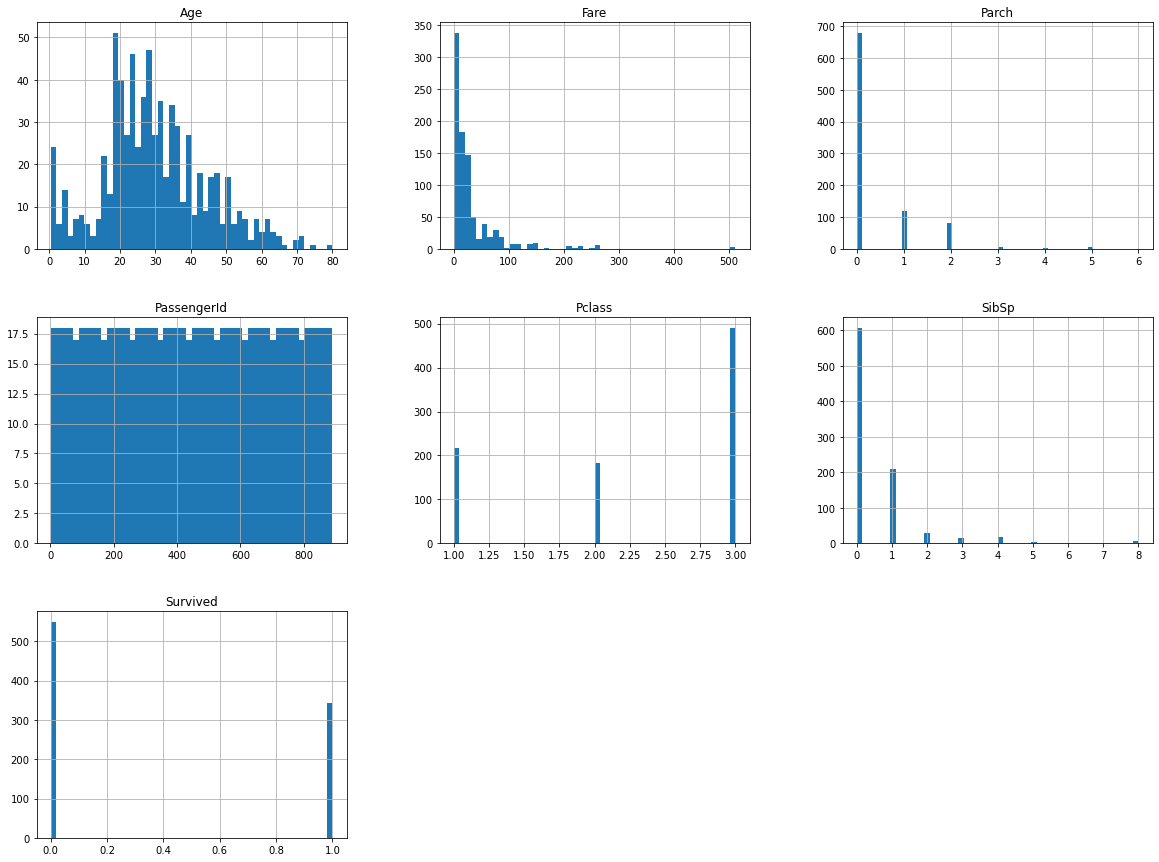

In [10]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [56]:
# 주어진 데이터들은 중요하니까 하나씩 체크해보자
#pasID = train_data['PassengerId']
#survived = train_data['Survived']
#pclass = train_data['Pclass']
#name = train_data['Name']
#sex = train_data['Sex']
age = train_data['Age']
#sibsp = train_data['SibSp']
#parch = train_data['Parch']
#ticket = train_data['Ticket']
#fare = train_data['Fare']ㅣㅅ
#cabin = train_data['Cabin']
#embarked = train_data['Embarked']

In [59]:
test = train_data[['Age', 'Survived']]

In [62]:
pd.value_counts(test['Survived'])

0    549
1    342
Name: Survived, dtype: int64

In [91]:
test[test['Survived']==0].count()

Age         424
Survived    549
dtype: int64

In [92]:
test[test['Survived']==1].count()

Age         290
Survived    342
dtype: int64

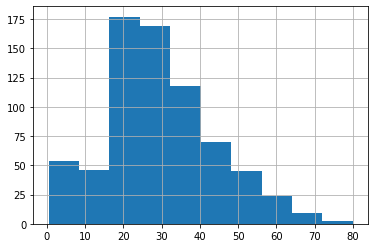

In [96]:
test['Age'].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2b1220a90>,
      dtype=object)

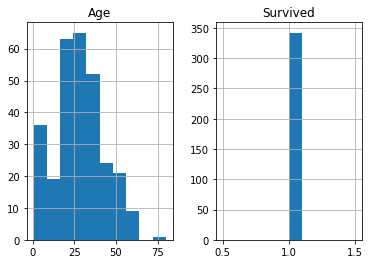

In [61]:
test[test['Survived']==1].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ac1cf110>,
      dtype=object)

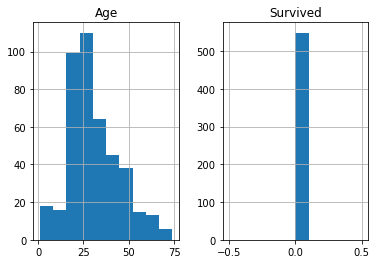

In [93]:
test[test['Survived']==0].hist(bins=10)

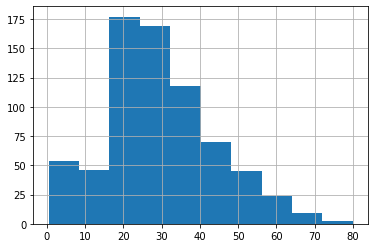

In [58]:
age.hist(bins=10)
plt.show()

In [18]:
fareAndPclass = train_data[['Pclass', 'Fare']]

In [21]:
fareAndPclass.where(fareAndPclass['Fare']>50)

,Pclass,Fare
0,NaN,NaN
1,1.0,71.2833
2,NaN,NaN
3,1.0,53.1000
4,NaN,NaN
...,...,...
886,NaN,NaN
887,NaN,NaN
888,NaN,NaN
889,NaN,NaN


In [27]:
fareAndPclass.describe()

,Pclass,Fare
count,891.000000,891.000000
mean,2.308642,32.204208
std,0.836071,49.693429
min,1.000000,0.000000
25%,2.000000,7.910400
50%,3.000000,14.454200
75%,3.000000,31.000000
max,3.000000,512.329200


In [55]:
bins = list([0,10,20,30,40,50,513])

In [56]:
result = pd.cut(fareAndPclass['Fare'], bins)

In [62]:
result.groupby(fareAndPclass['Fare']).sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f8057dd1090>>

In [11]:
train_x = train_data.drop(['Survived','PassengerId'], axis=1)
train_y = train_data['Survived']

In [12]:
train_y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
train_x['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64